##Money Change##

In [1]:
%%writefile punto1.cpp
#include <iostream>
using namespace std;
int get_change(int m) {
  //write your code here
  int totalCoins = 0;

  
    totalCoins += m/10;
    m = m%10;
  
    totalCoins += m/5;
    m = m%5;  
  
    totalCoins += m/1;
    m = m%1;
  
  return totalCoins;
}

int main() {
  int m;
  cin >> m;
  cout << get_change(m) << '\n';
}


Writing punto1.cpp


In [2]:
!g++ punto1.cpp -o executable
!./executable

28
6


##Maximum Value of the Loot##

In [3]:
%%writefile punto2.cpp
#include <iostream>
#include <vector>

using std::vector;
using namespace std;
int getMax(vector<int> weights, vector<int> values){
  double max = 0.0;
  int maxIndex = 0;
  for(int i = 0; i< values.size();i++){
    if((values[i]+0.0)/(weights[i]+0.0) > max ){
      maxIndex = i;
      max = (values[i]+0.0)/(weights[i]+0.0);
    } 
  }
  if(max == 0){
    return -1;
  }
  return maxIndex;
}
double get_optimal_value(int capacity, vector<int> weights, vector<int> values) {
  double value = 0.0;

  // write your code here
  while(capacity>0){
    int maxIndex = getMax(weights, values);
    if(maxIndex == -1) return value;
    double prop = (values[maxIndex]+0.0)/(weights[maxIndex]+0.0);
    if(capacity <= weights[maxIndex]){
      value += prop * capacity;
      //out<<prop<<endl;
      return value;
    }
    else{
      value += prop * weights[maxIndex]; 
      capacity -= weights[maxIndex];
      //cout<<capacity<<endl;
    }
    values[maxIndex] = 0;
  }
  return value;
}


int main() {
  int n;
  int capacity;
  std::cin >> n >> capacity;
  vector<int> values(n);
  vector<int> weights(n);
  for (int i = 0; i < n; i++) {
    std::cin >> values[i] >> weights[i];
  }

  double optimal_value = get_optimal_value(capacity, weights, values);

  std::cout.precision(10);
  std::cout << optimal_value << std::endl;
  return 0;
}


Writing punto2.cpp


In [4]:
!g++ punto2.cpp -o executable
!./executable

1 10 500 30
166.6666667


##Car Fueling##

In [5]:
%%writefile punto3.cpp
#include <iostream>
#include <vector>

using std::cin;
using std::cout;
using std::vector;
using std::max;
using std::endl;

int compute_min_refills(int dist, int tank, vector<int> & stops) {
    // write your code here
    int totalFuel = tank;
    int i = 0;
    int recorrido = 0;
    int totalSteps = 0;
    //cout<<stops[0]<<endl;
    while(recorrido<dist){
        while(i<(stops.size()) && stops[i]<=totalFuel){
            recorrido = stops[i];
            i++;
            //cout<<i<<endl;
        }
        if(i == stops.size()) return totalSteps;
        totalSteps++;
        totalFuel = recorrido  + tank;
        //cout<<totalFuel<<endl;
        if((stops[i])>totalFuel) return -1;
    }
    return -1;
}


int main() {
    int d = 0;
    cin >> d;
    int m = 0;
    cin >> m;
    int n = 0;
    cin >> n;

    vector<int> stops(n+1);
    for (size_t i = 0; i < n; ++i)
        cin >> stops.at(i);
    stops[stops.size()-1] = d;
    //cout<<stops[stops.size()-1];
    cout << compute_min_refills(d, m, stops) << "\n";

    return 0;
}



Writing punto3.cpp


In [6]:
!g++ punto3.cpp -o executable
!./executable

950 400 4 200 375 550 750
2


##Maximum Advertisement Revenue##

In [7]:
%%writefile punto4.cpp

#include <algorithm>
#include <iostream>
#include <vector>

using std::vector;
int max(vector<long> vector){
  int max = 1000000;
  int index = 1000000;
  for(int i = 0; i<vector.size(); i++){
    if(vector[i] < max){ 
      max = vector[i];
      index = i;
      //std::cout<<"Max en: "<< i<<std::endl;
    }
  }
  return index;
}
long long max_dot_product(vector<long> a, vector<long> b) {
  // write your code here
  long long sumProducts = 0;
  for (size_t i = 0; i < a.size(); i++) {
    int maxa = max(a);
    int maxb = max(b);
    sumProducts += a[maxa]*b[maxb];
    //std::cout<<sumProducts<<std::endl;
    a[maxa] =  1000000;
    b[maxb] =  1000000;
  }
  return sumProducts;
}

int main() {
  size_t n;
  std::cin >> n;
  vector<long> a(n), b(n);
  for (size_t i = 0; i < n; i++) {
    std::cin >> a[i];
  }
  for (size_t i = 0; i < n; i++) {
    std::cin >> b[i];
  }
  std::cout << max_dot_product(a, b) << std::endl;
}



Writing punto4.cpp


In [8]:
!g++ punto4.cpp -o executable
!./executable

 1 23 39
897


##Collecting Signatures##

In [9]:
%%writefile punto5.cpp
#include <algorithm>
#include <iostream>
#include <climits>
#include <vector>

using std::vector;

struct Segment {
  int start, end;
};

vector<int> optimal_points(vector<Segment> &segments) {
  vector<int> points;
  //write your code here
  for (size_t i = 0; i < segments.size(); ) {
      points.push_back(segments[i].end);
      int point = segments[i].end;
      segments.erase(segments.begin()+i);
      int j = i;
      while(j < segments.size()){
        if(point >= segments[j].start){
          segments.erase(segments.begin()+j);
        }
        else{
          j++;
        }
      }
  }
  return points;
}

int main() {
  int n;
  std::cin >> n;
  vector<Segment> segments(n);
  for (size_t i = 0; i < segments.size(); ++i) {
    std::cin >> segments[i].start >> segments[i].end;
  }
  for (size_t i = 0; i < segments.size(); ++i) {
    for (size_t j = 0; j < segments.size()-1; ++j) {
      if(segments[j].end > segments[j+1].end){
        Segment aux1 = segments[j];
        segments[j] = segments[j+1];
        segments[j+1] = aux1;
      }
    }
  }
  /*for (size_t i = 0; i < segments.size(); ++i) {
    std::cout << segments[i].end << " ";
  }
  std::cout<<"\n";
  std::cout <<segments.size() <<"\n";
  */
  vector<int> points = optimal_points(segments);
  std::cout << points.size() << "\n";
  for (size_t i = 0; i < points.size(); ++i) {
    std::cout << points[i] << " ";
  }
  
}


Writing punto5.cpp


In [10]:
!g++ punto5.cpp -o executable
!./executable

3 1 3 2 5 3 6
1
3 

##Maximum number of prizes##

In [11]:
%%writefile punto6.cpp

#include <iostream>
#include <vector>

using std::vector;

vector<int> optimal_summands(int n) {
  vector<int> summands;
  //write your code here
  int prePrize = 0;
  int prize = n;
  while(prize > 0){
    if(prize - prePrize - 1 <= prePrize + 1){
      summands.push_back(prize);
      //std:: cout<<"Estuve aquí"<<std::endl;
      break;
    }
    prePrize = prePrize + 1;
    prize = prize - prePrize;
    summands.push_back(prePrize);
  }
  return summands;
}

int main() {
  int n;
  std::cin >> n;
  vector<int> summands = optimal_summands(n);
  std::cout << summands.size() << '\n';
  for (size_t i = 0; i < summands.size(); ++i) {
    std::cout << summands[i] << ' ';
  }
}


Writing punto6.cpp


In [12]:
!g++ punto6.cpp -o executable
!./executable

8
3
1 2 5 

##Maximum Salary##

In [13]:
%%writefile punto7.cpp

#include <algorithm>
#include <sstream>
#include <iostream>
#include <vector>
#include <string>

using std::vector;
using std::string;

string largest_number(vector<string> a) {
  //write your code here
  std::stringstream ret;
  ret << "";
  while(a.size()>0){
    string maxInt = "-1";
    int maxIndex = -1;
    for (size_t i = 0; i < a.size(); i++) {
      if(maxInt.at(0) == a[i].at(0)){
        
        std::stringstream aux1;
        std::stringstream aux2;
        aux1 << maxInt<<a[i];
        aux2 << a[i]<<maxInt;
        string aux12;
        string aux22;
        
        aux1 >> aux12;
        aux2 >> aux22;
        if(std::stoi(aux12) < std::stoi(aux22)){
          maxInt = a[i];
          maxIndex = i;
        }
      }
      if(maxInt.at(0)<a[i].at(0)){
        maxInt = a[i];
        maxIndex = i;
        
      }
      
    }
    //std::cout<< "Max: "<< maxInt<<std::endl;
    ret << maxInt;
    a.erase(a.begin()+maxIndex);
  }
  
  string result;
  ret >> result;
  return result;
}

int main() {
  int n;
  std::cin >> n;
  vector<string> a(n);
  for (size_t i = 0; i < a.size(); i++) {
    std::cin >> a[i];
  }
  std::cout << largest_number(a);
}


Writing punto7.cpp


In [14]:
!g++ punto7.cpp -o executable
!./executable

 2 21 2
221

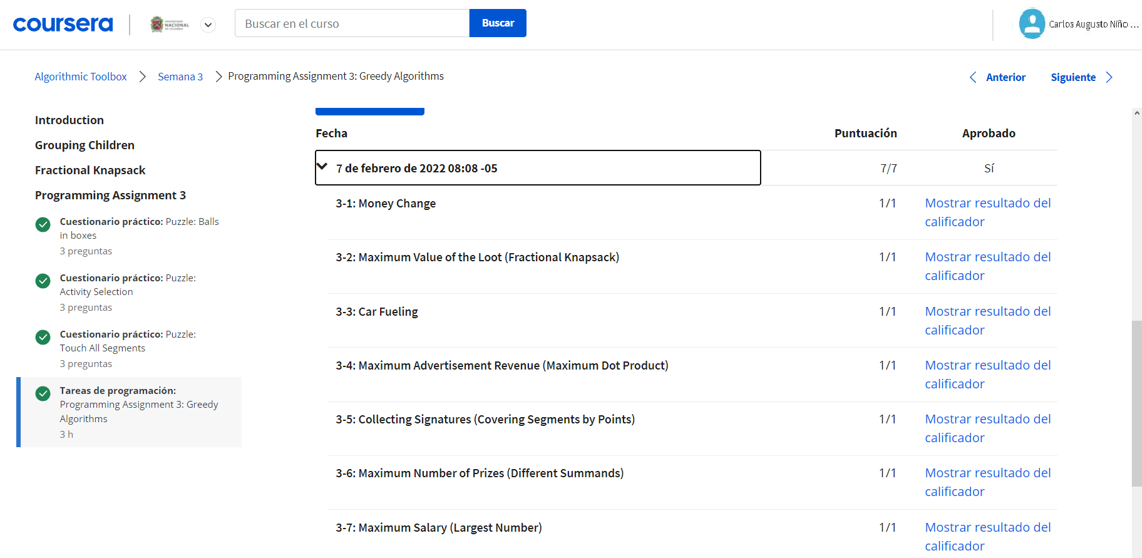

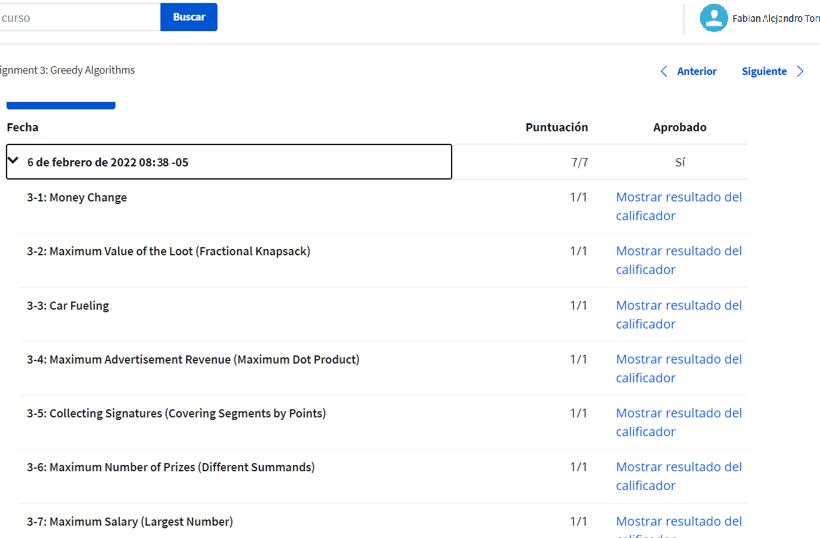